In [1]:
#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats

#import api key
from config import weather_api_key

#incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)
lat_range = (-10, 4)
lng_range = (1, 2)

#formatting for bold text
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [2]:
#printing out the minneapolis json to see the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "minneapolis").json()
response

{'coord': {'lon': -93.26, 'lat': 44.98},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 32.95,
  'feels_like': 24.87,
  'temp_min': 30,
  'temp_max': 35.6,
  'pressure': 1012,
  'humidity': 97},
 'visibility': 16093,
 'wind': {'speed': 8.05, 'deg': 180},
 'clouds': {'all': 90},
 'dt': 1579704393,
 'sys': {'type': 1,
  'id': 5829,
  'country': 'US',
  'sunrise': 1579700584,
  'sunset': 1579734337},
 'timezone': -21600,
 'id': 5037649,
 'name': 'Minneapolis',
 'cod': 200}

In [3]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low=-10.000, high=4.000, size=1500)
lngs = np.random.uniform(low=1.000, high=2.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add a one second interval between queries to stay within API query limits
time.sleep(1)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

8

In [4]:
#Perform API Calls
#write something more descriptive...

#base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_info = []

#in order to print the print log according to how the homework looks (change comment before final draft)
i = 1
set_number = 1

print("Beginning Data Retrieval") 
print("--------------------------------")

for j, city in enumerate(cities):
    
    if (j % 50 == 0 and j >= 50):
        set_number = set_number + 1
        i = 0
    print(f"Processing Record {i} of Set {set_number} | {city}")
    i=i+1
   
    response = requests.get(query_url + city).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        lat = response['coord']['lat']
        name = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lngs = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        city_info.append({"City": name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lngs,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
    except:
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | port-gentil
Processing Record 2 of Set 1 | omboue
Processing Record 3 of Set 1 | anloga
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | mumford
Processing Record 6 of Set 1 | takoradi
Processing Record 7 of Set 1 | gamba
Processing Record 8 of Set 1 | winneba
------------------------
Data Retrieval Complete
------------------------


In [5]:
#export the city data into a csv
#display the dataframe

city_df = pd.DataFrame(city_info)

city_df.to_csv('cities.csv', encoding="utf-8", index_label="City_ID")

city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port-Gentil,20,GA,1579704471,70,-0.72,8.78,89.60,11.41
1,Omboue,92,GA,1579704472,69,-1.57,9.26,87.40,3.89
2,Anloga,20,GH,1579704473,59,5.79,0.90,91.40,6.93
3,Jamestown,1,US,1579704317,78,42.10,-79.24,24.01,9.17
4,Mumford,67,GH,1579704476,36,5.26,-0.76,95.85,11.41
5,Takoradze,67,GH,1579704477,45,4.88,-1.76,92.57,8.48
6,Gamba,88,GA,1579704478,72,-2.65,10.00,85.55,9.13
7,Winneba,46,GH,1579704479,59,5.35,-0.62,89.60,10.29


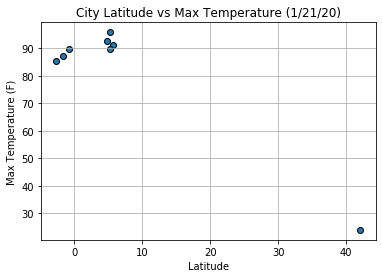

In [6]:
#plot latitude v temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Max Temperature (1/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Temp_v_Latitude.png"))

#for reference on setting limits:
#plt.xlim(-50, 35)
#plt.ylim(20, 100)

**CODE:**  This code is utilizing www.openweathermap.org to gather data on cities around the globe.  We specifically called for info on city name, latitudes, longitudes, cloudiness, humidity, wind speed, country and date.  For the above scatter plot, we looked at max temperature versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

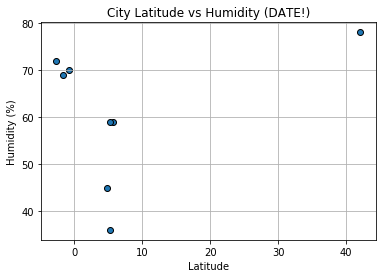

In [7]:
#plot latitude v humidity
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Humidity (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Humidity_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at humidity relative to city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

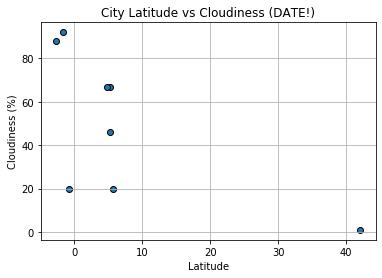

In [8]:
#plot latitude v cloudiness
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Cloudiness (DATE!)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Cloudiness_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at cloudiness versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

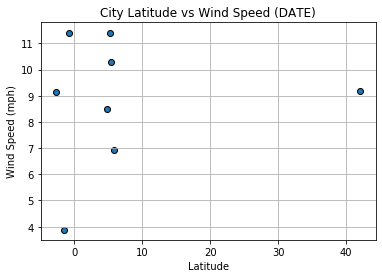

In [9]:
#plot latitude v wind speed
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.title("City Latitude vs Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Wind_Speed_v_Latitude.png"))

**CODE:**  For the above scatter plot, we looked at wind speed versus the city latitude.

**ANALYSIS:**  For testing purposes, we're looking at a small cluster, so it makes sense that the scatter plot is focused. 

In [10]:
#run linear regressions on the above relationships, by hemisphere
#max temp (F) v latitude
#humidity (%) v latitude
#cloudiness (%) v latitude
#wind speed (mph) v latitude

In [45]:
#create northern hemisphere dataframe

#logic test/conditional statement returns a series of boolean values; make sure on the right track
northern_hem = city_df["Lat"] >= 0

#locate where the 'Lat' values are >= 0; reset index for cleaner formatting
northern_df = city_df.loc[city_df["Lat"] >= 0, :].reset_index()

#get rid of newly created 'index' column resulting from above code
northern_df = northern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Anloga,20,GH,1579704473,59,5.79,0.90,91.40,6.93
1,Jamestown,1,US,1579704317,78,42.10,-79.24,24.01,9.17
2,Mumford,67,GH,1579704476,36,5.26,-0.76,95.85,11.41
3,Takoradze,67,GH,1579704477,45,4.88,-1.76,92.57,8.48
4,Winneba,46,GH,1579704479,59,5.35,-0.62,89.60,10.29


In [46]:
#create southern hemisphere dataframe

#logic test for my own knowledge; not necessarily needed to create the dataframe
southern_hem = city_df["Lat"] < 0

#create southern hemisphere dataframe
southern_df = city_df.loc[city_df["Lat"] < 0, :].reset_index()
southern_df = southern_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port-Gentil,20,GA,1579704471,70,-0.72,8.78,89.60,11.41
1,Omboue,92,GA,1579704472,69,-1.57,9.26,87.40,3.89
2,Gamba,88,GA,1579704478,72,-2.65,10.00,85.55,9.13


Text(0, 0.5, 'Max Temperature')

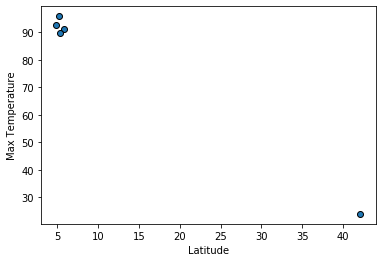

In [64]:
#run linear regression on max temp v latitude (northern hemisphere)

#first create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [65]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    91.482005
1    24.008445
2    92.466885
3    93.173025
4    92.299641
Name: Lat, dtype: float64


In [66]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.86x +102.24


The r-squared is: -0.9974547226996701


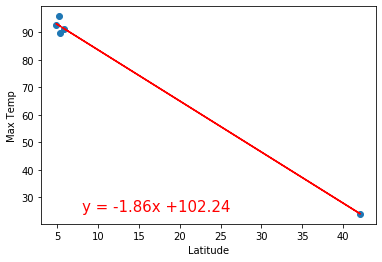

<Figure size 432x288 with 0 Axes>

In [67]:
#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Temp_v_Latitude.png"))

**ANALYSIS:** There appears to be an outlier; it shouldn't be in the data I don't think.  The rest are clustered appropriately.

Text(0, 0.5, 'Max Temperature')

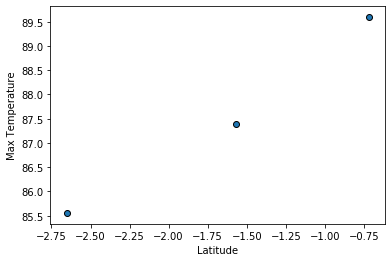

In [68]:
#run linear regression on max temp v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

In [69]:
#perform a linear regression on temp v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    89.44542
1    87.67624
2    85.42834
Name: Lat, dtype: float64


In [70]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 2.08x +90.94


The r-squared is: 0.9929813801601053


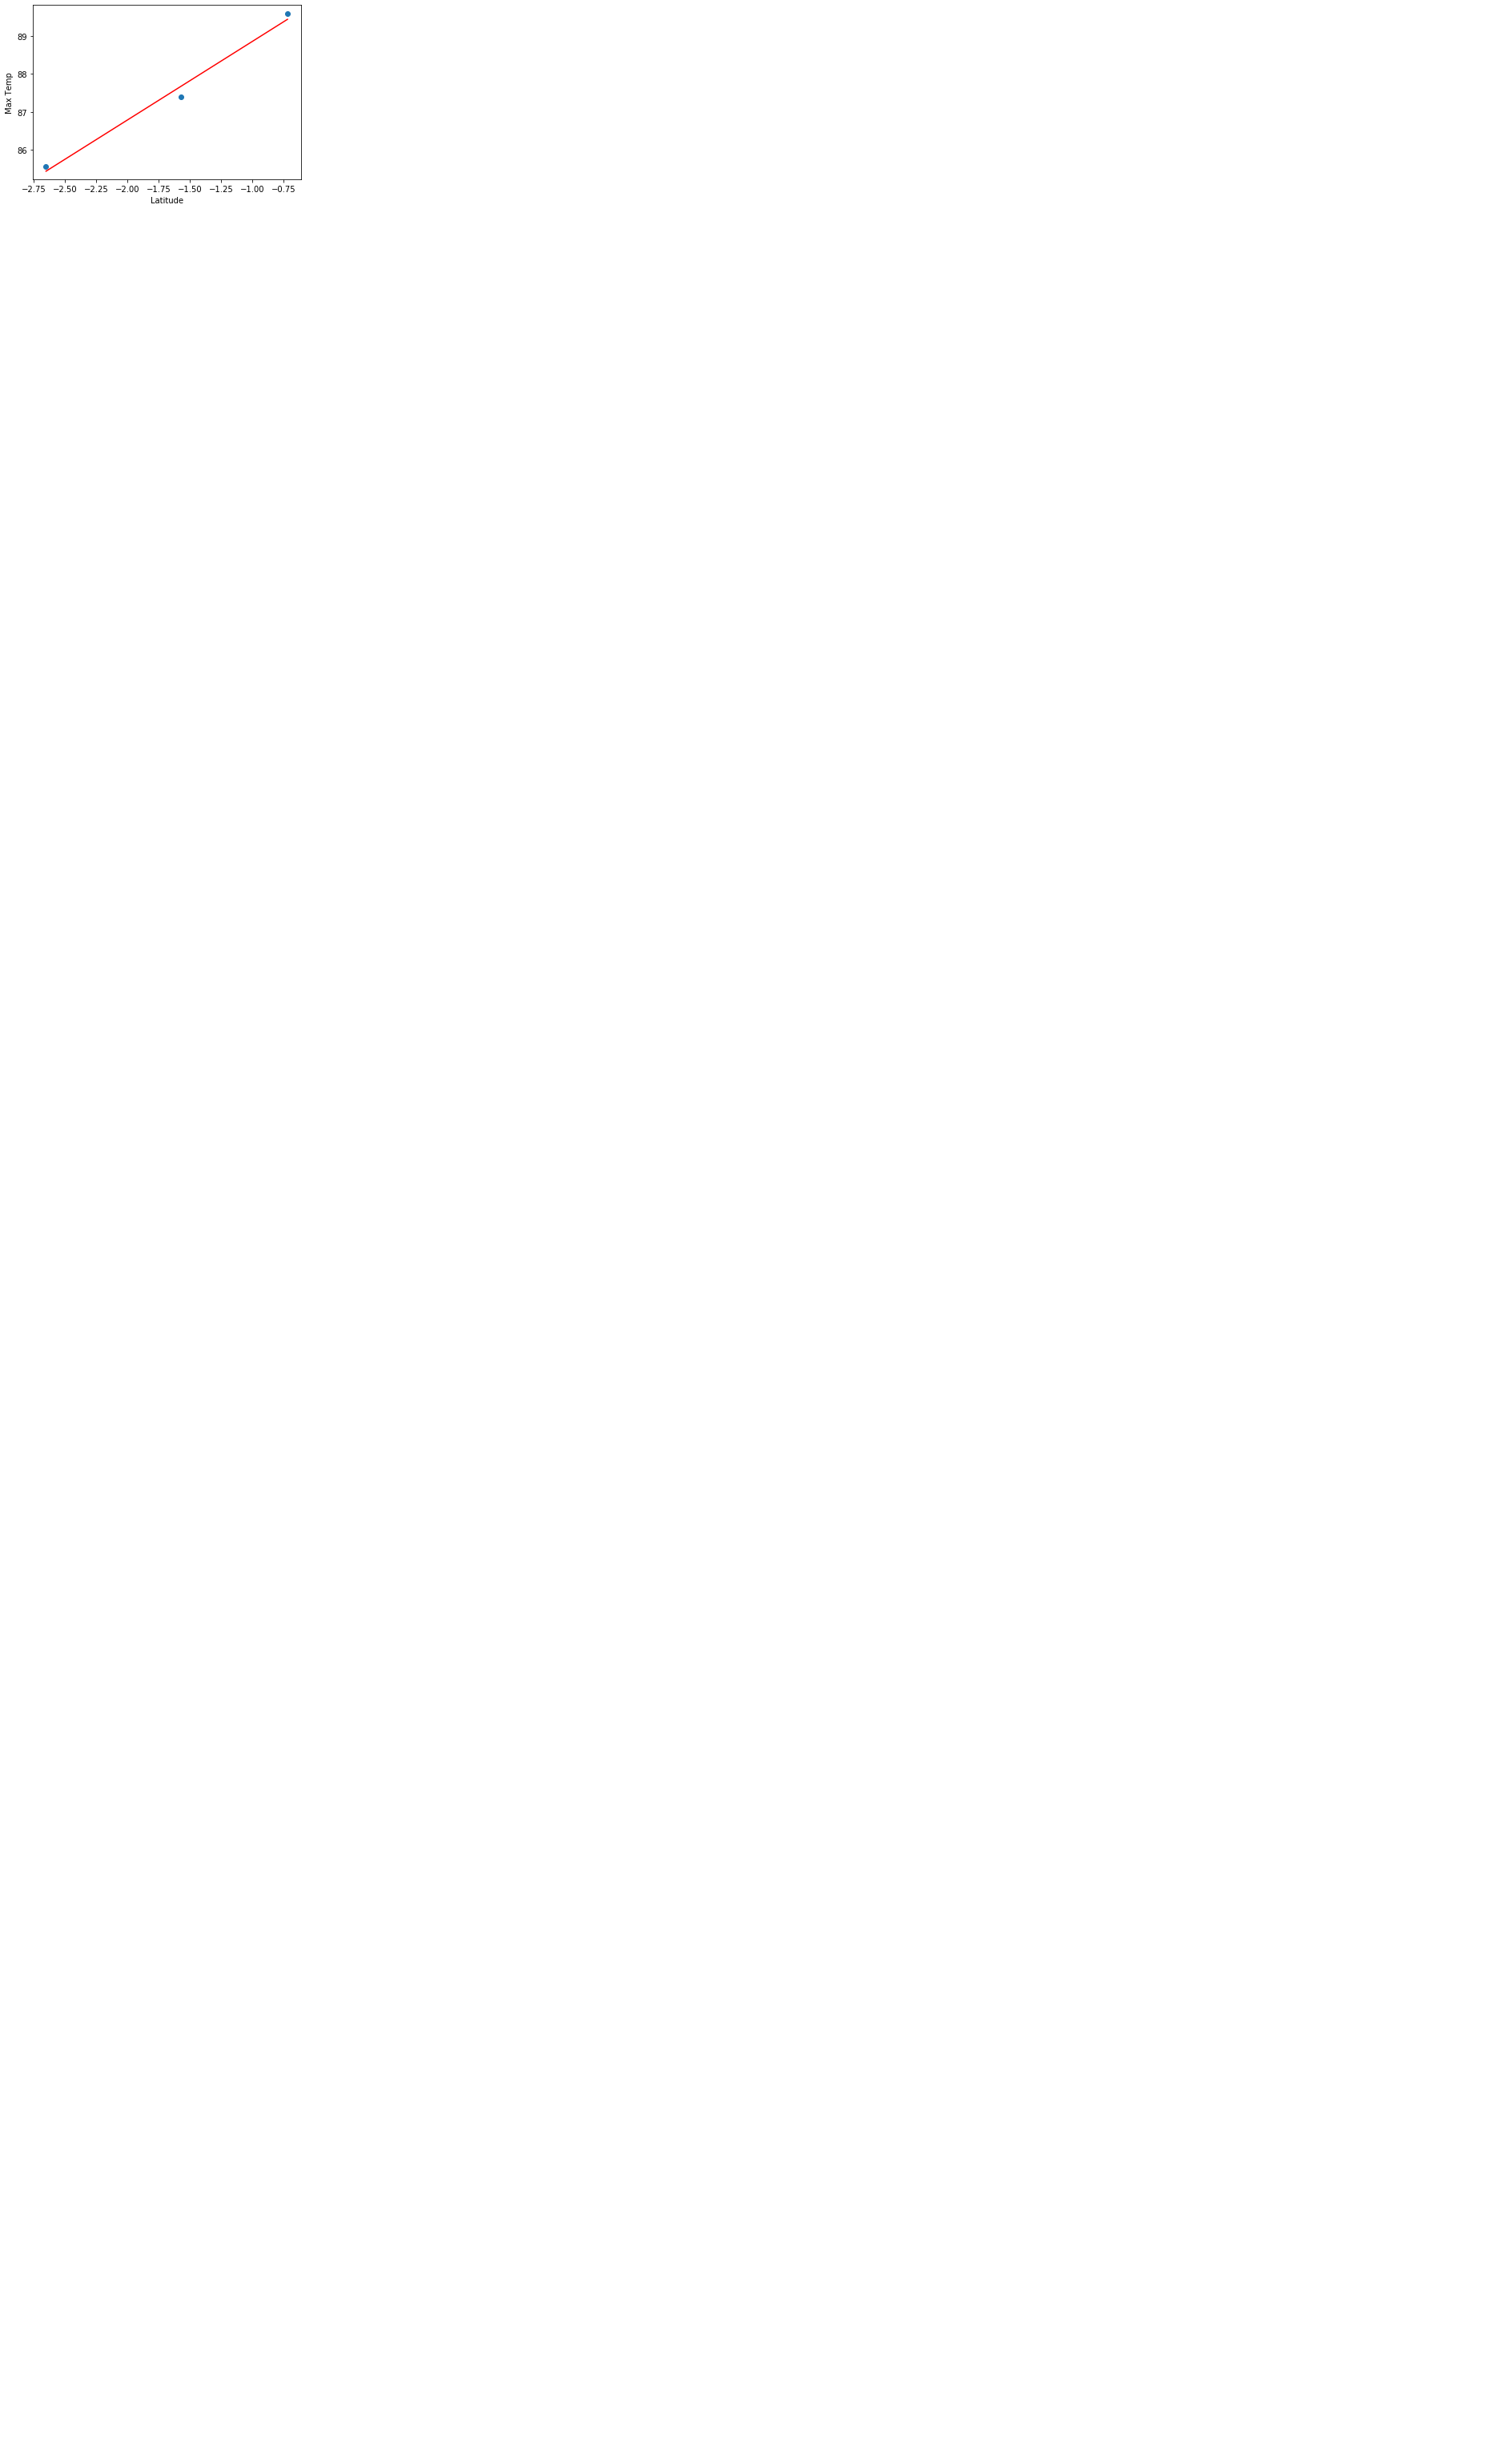

<Figure size 432x288 with 0 Axes>

In [71]:
#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(8,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Temp_v_Latitude.png"))

**ANALYSIS:** This graph appears to be small due to the small data set.  I ran everything with the full range of lats and longs, and the graph appeared 'normal."

Text(0, 0.5, 'Humidity')

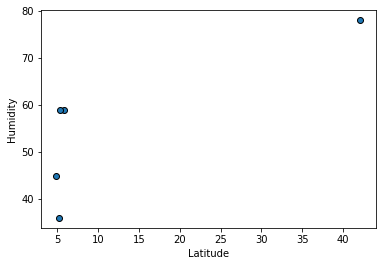

In [72]:
#run linear regression on humidity v lat (northern hemisphere)

#create scatter plot
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [73]:
#perform a linear regression on humidity v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    50.065087
1    78.196177
2    49.654471
3    49.360067
4    49.724198
Name: Lat, dtype: float64


In [74]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.77x +45.58


The r-squared is: 0.7977111737698639


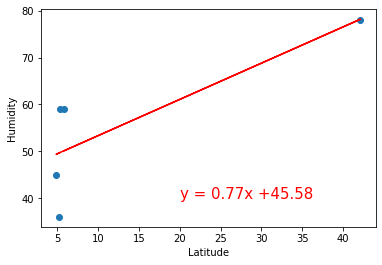

<Figure size 432x288 with 0 Axes>

In [75]:
#create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save plot to images folder
plt.savefig(os.path.join("Images","Northern_Humidity_v_Latitude.png"))

**ANALYSIS:**  Again we have that outlier.  A spread of temps, concentrated latitudes.

Text(0, 0.5, 'Humidity')

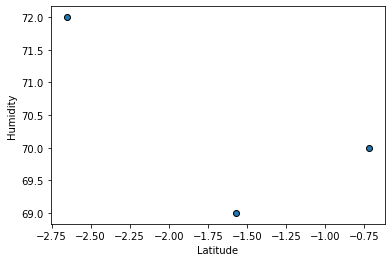

In [76]:
#plot linear regression on humidity v lat (southern hemisphere)

#create scatter plot
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [77]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    69.301650
1    70.247978
2    71.450372
Name: Lat, dtype: float64


In [78]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.11x +68.5


The r-squared is: -0.7049974260985756


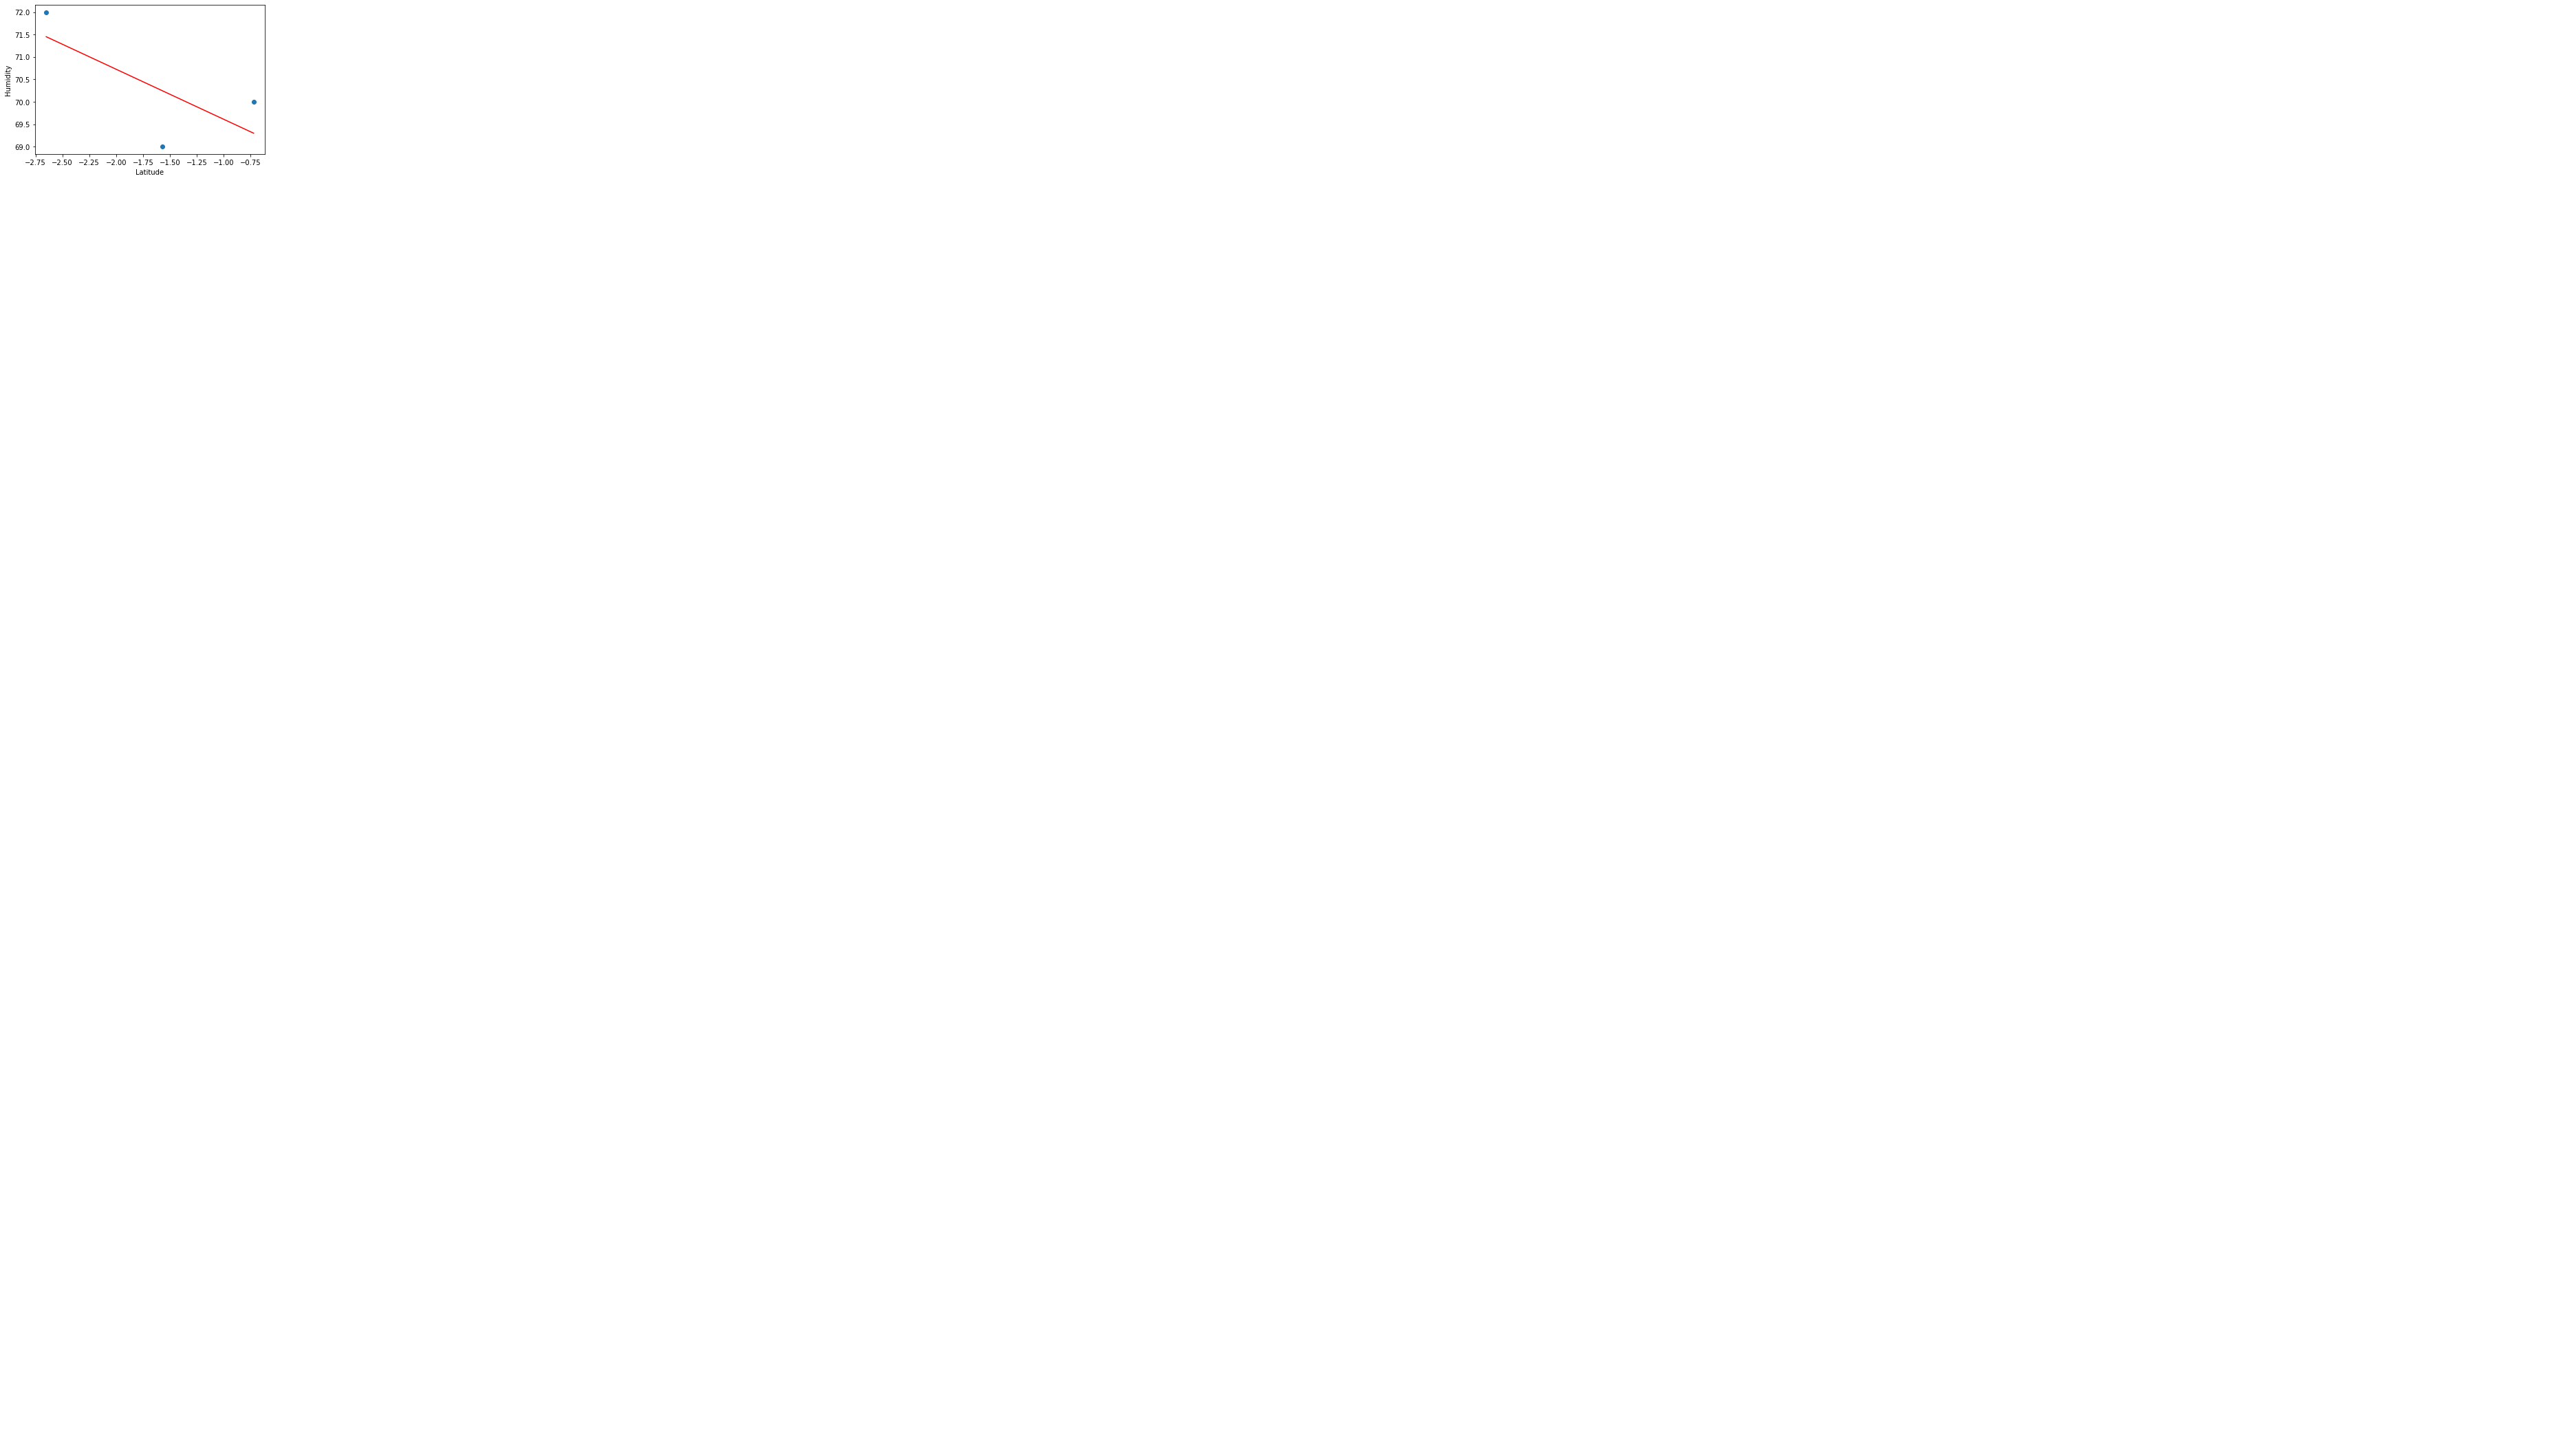

<Figure size 432x288 with 0 Axes>

In [79]:
#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save to Images Folder
plt.savefig(os.path.join("Images","Southern_Humidity_v_Latitude.png"))

**ANALYSIS:**  Again, our graph comes up very small.  Will want to do another check after I create the rest!

Text(0, 0.5, 'Cloudiness')

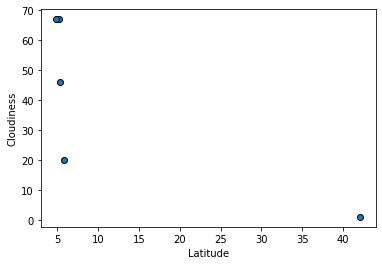

In [80]:
#plot cloudiness v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [81]:
#perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    49.514803
1     0.397683
2    50.231742
3    50.745774
4    50.109998
Name: Lat, dtype: float64


In [82]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.35x +57.35


The r-squared is: -0.7616663666860908


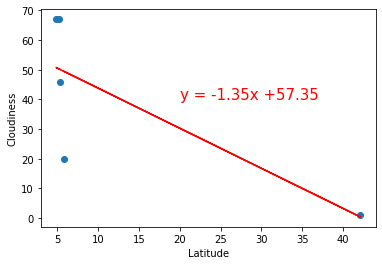

<Figure size 432x288 with 0 Axes>

In [83]:
#create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_Cloudiness_v_Latitude.png"))

**ANALYSIS:** This graph is normal size!

Text(0, 0.5, 'Cloudiness')

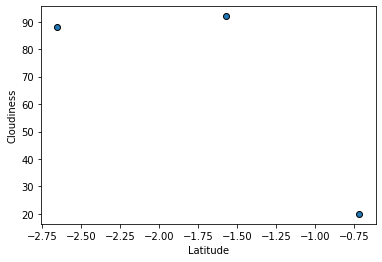

In [84]:
#plot cloudiness v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [85]:
#perform a linear regression on cloudiness v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     35.613809
1     64.097545
2    100.288646
Name: Lat, dtype: float64


In [86]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -33.51x +11.49


The r-squared is: -0.801054980729366


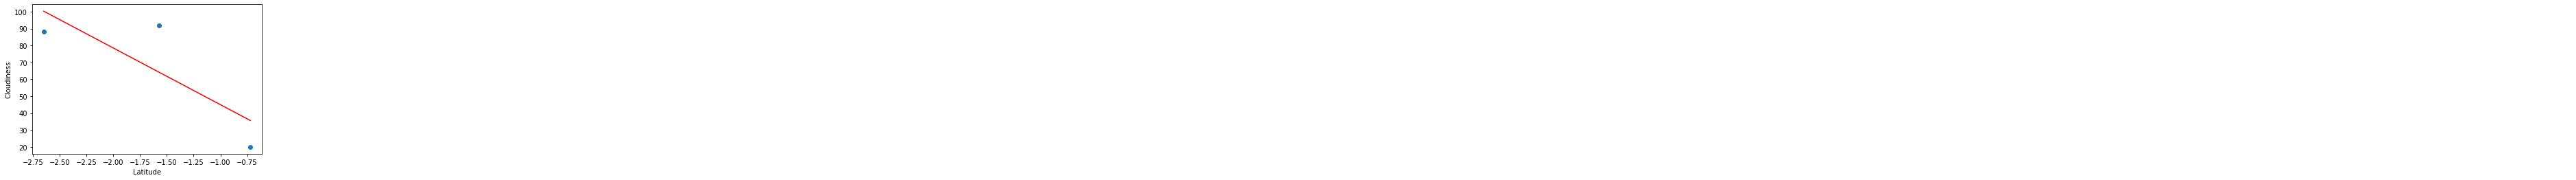

<Figure size 432x288 with 0 Axes>

In [87]:
#create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Southern_Cloudiness_v_Latitude.png"))

**ANALYSIS:** Again the graph is very small.  Will need to check by running a larger sample.


Text(0, 0.5, 'Wind Speed')

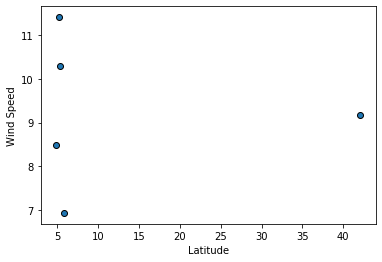

In [88]:
#plot wind speed v lat linear regression (northern hemisphere)

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [89]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    9.281525
1    9.146932
2    9.283489
3    9.284898
4    9.283156
Name: Lat, dtype: float64


In [90]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.0x +9.3


The r-squared is: -0.03561326024581664


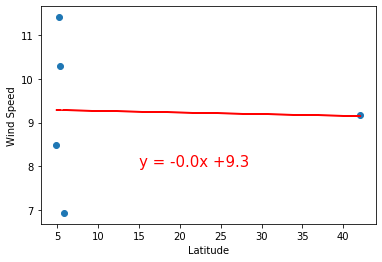

<Figure size 432x288 with 0 Axes>

In [91]:
#create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(15,8),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to Images Folder
plt.savefig(os.path.join("Images","Northern_WindSpeed_v_Latitude.png"))

**ANALYSIS:** This graph appears to be normal sized.  The outlier is still there.

Text(0, 0.5, 'Wind Speed')

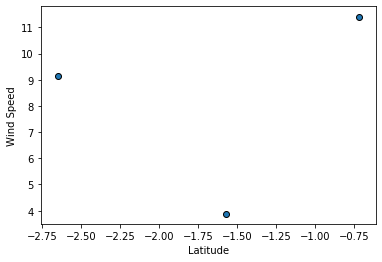

In [92]:
#plot wind speed v lat linear regression (southern hemisphere)

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [93]:
#perform a linear regression on wind speed v lat
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    8.990668
1    8.213437
2    7.225896
Name: Lat, dtype: float64


In [94]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.91x +9.65


The r-squared is: 0.22938325479848592


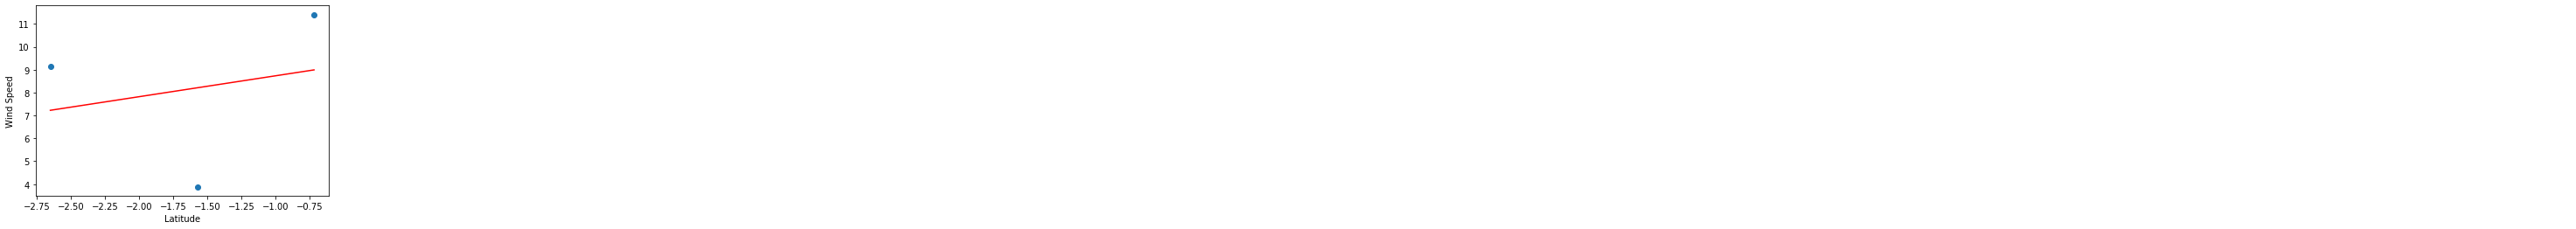

<Figure size 432x288 with 0 Axes>

In [95]:
#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(15,8),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

#save scatter plot to images folder
plt.savefig(os.path.join("Images","Southern_WindSpeed_v_Latitude.png"))

**ANALYSIS:** Again the graph is small, but I bet this will change when I broaden my lat and lng scope.